# Histograms
***

### What are histograms? 
Histograms are used to represent which things occur more or less frequently. For example, you could measure the heights of everyone in the class, and make a histogram, counting frequency of different height ranges. 

<img src="../images/plotting-heights.png" width=500px>

Histograms are often used to look at patterns in collected data.   In particular histograms help interpret how multiple measurements of the same thing are distributed.   As such, histograms are particularly useful for statistics.  Histograms are always very useful in visually comparing samples: although you could have an equally tall woman and a man, a histogram of heights for 2 different sexes shows that in general, women are shorter.

***
### Histograms in Python

In python, histograms are created using `hist()` command from **MatPlotLib Pyplot** library. The syntax is:

    hist(x, bins=..., density=..., label=..., other arguments)
    
* `x` **(required)**: this is the data you want to make a histogram of. This should be just the measurements themselves; python will create bins and count the numbers in each bin.
* `bins`: number of bins. **Default is 10**. You usually want more than that, see discussion below.
* `density` (True or False; default is False). If you want to display the number of measurements in each bin, choose False. <br>
If you want to display **probability density** and overplot a bell curve, choose True.
* `label` used for [creating the Legend](4%20Legends%2C%20Labels%2C%20Annotations.ipynb)
* Other arguments are [explained in the docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). <br>
  Some arguments that let you change the appearance of the histogram are `color`, `rwidth`, `edgecolor`, `facecolor`, `alpha` ...

***
## Example: Regular Histogram

Before we make the histogram, we need to prepare some data and import MatPlotLib. If you have MPL imported and data ready, skip this step.

In [92]:
# This cell doesn't directly produce a histogram but initializes everything required. 
# Before you start creating the histogram, make sure you 1) have your data and 2) import matplotlib

import matplotlib.pyplot as plt   # Import matplotlib
import numpy as np
%matplotlib inline

# Create a set of 1000 random numbers with mean 0 and standard deviation of 1
# We use the  SciPy stats library for this
from scipy.stats import norm
myData = norm.rvs(0, scale=1, size=1000)    # Create 1000 random variables with mean 0 and standard deviation 1

Now make the histogram itself:

Text(0,0.5,'Count')

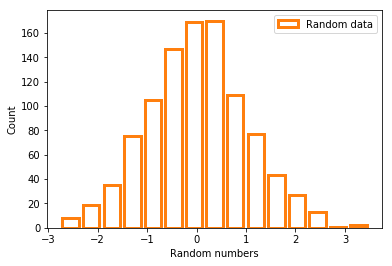

In [93]:
plt.hist(myData, bins=15, density=False, label="Random data",                     # These parameters are useful
         alpha=1.0, facecolor="white", edgecolor="C1", linewidth=3, rwidth=0.8)   # This is just customizing the look

plt.legend()
plt.xlabel("Random numbers")
plt.ylabel("Count")

## Example: Histogram with a Bell Curve
***

A lot of data in physics follows a **Normal** or **Gaussian** distribution which is defined by a **mean** and a **standard deviation**. See the [Significance tutorial](link) for a much longer discussion on why this is important!

It's useful to overplot a bell curve to show where the mean is, and to see if our data follows the normal distribution. To do this, you will need to use **SciPy `stats`** package.

* `norm` module from **SciPy stats** defines all function related to Gaussian curves. [The docs are found here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

The function we are going to use is `norm.pdf`. It takes in some x-values as inputs, and outputs the **probability density function (PDF)** at that x. PDF is sort of like a probability: it states *what is the probability to get a value in a small range $(x-\delta x, x+\delta x)$*. Think of `norm.pdf(x)` as a function similar to your defined curve-fit functions, that takes in an x-value and returns a theoretical prediction.

    norm.pdf(x, loc=0, scale=1)
    
* `loc` is the mean (0 by default)
* `scale` is the standard deviation (1 by default)

So to plot the Gaussian PDF, we need to:

1. Make a list of x-values that roughly span the histogram range
2. Figure out the **mean** and the **SD** of our data
3. Call `norm.pdf` with those x values, mean and SD

Fit Results:
Mean=0.015  Standard Deviation=1.00  Standard Error=0.032


Text(-3,0.3,'St. Dev = 1.00')

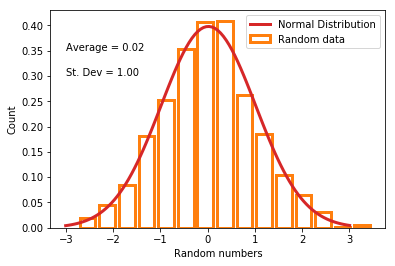

In [116]:
# Fit a normal curve
mean, stdev = norm.fit(myData)

# Plot the histogram
plt.hist(myData, bins=15, density=True, label="Random data",                     # These parameters are useful
         alpha=1.0, facecolor="white", edgecolor="C1", linewidth=3, rwidth=0.8)   # This is just customizing the look


# Create a dummy set of x-values for the Gaussian function, spanning +/- 3 sigma range
x_vals = np.linspace(-3*stdev, 3*stdev, 100)

# Figure out the PDF value for each value of x
pdf    = norm.pdf(x_vals, loc=mean, scale=stdev)

# Plot the Gaussian PDF on the same axis
plt.plot(x_vals, pdf, "-", color="C3", linewidth=3, label="Normal Distribution")

# Add labels and a legend
plt.legend()
plt.xlabel("Random numbers")
plt.ylabel("Count")

# Calculate the standard deviation of the mean just for fun
stderr = stdev/np.sqrt(myData.size)
print("Fit Results:")
print("Mean=%2.3f  Standard Deviation=%2.2f  Standard Error=%2.3f" % (mean,stdev,stderr))

# Add annotation text if you want to be extra fancy
# BE CAREFUL: The first two arguments are (x, y) coordinates - make sure this is still on the plot when you change data to 
# your own
plt.text(-3,0.35,"Average = %2.2f"%(mean) )
plt.text(-3,0.3, "St. Dev = %2.2f"%(stdev))

## Figuring out Bin Width
***
When you're not familiar with histograms, choosing the right number of bins can be confusing... and there is no easy solution rather than wait until you have an eye for it :( In general, you want to follow one rule:

> Large-scale patterns should be apparent and small-scale random variance should be hidden <br>
E.g. is there an obvious mean? Is the distribution heavier on one side than on the other? Does it look Gaussian? 

* If the bin size is **too large** (too few bins), you will not see the mean clearly, and you might not see the steady decline towards the tails of the distribution
* If the bin size is **too small** (too many bins), you will see spiky histogram with no clear preferred range, or no clear mean, and lots of random fluctuations between different bins.

#### Too many bins:

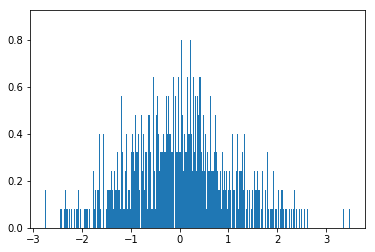

In [101]:
plt.hist(myData, bins=500, density=True, label="Random data");   # This is just customizing the look

#### Too few bins:

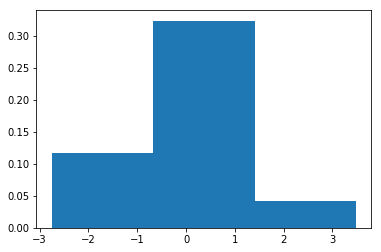

In [103]:
plt.hist(myData, bins=3, density=True, label="Random data");   # This is just customizing the look

## Setting the bins at specific places
***

Sometimes you might want to decide on the value ranges used in the histogram yourself. For example, you might want to
 * Compare 2 different data sets: having the same bin positions makes comparison easier
 * Have uneven bin sizes 
 
If you set `bins=` as a list of **bin edges** rather than just a number of bins, `hist()` will set the bin limits at those locations.

Before we start, let's make another set of data to put on the same axis; this time with **mean=0.5** instead of 0.

In [108]:
myData2 = norm.rvs(0.5, scale=1, size=1000)    # Create 1000 random variables with mean 0.5 and standard deviation 1

Now, set the bin edges and make a histogram:

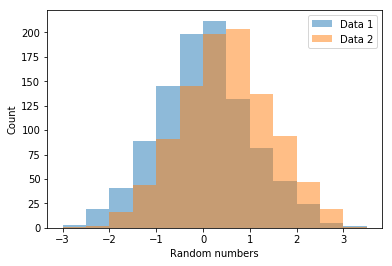

In [111]:
bin_edges = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]  # This can also be done with np.arange(-3,3.5,0.5)

# Plot the first set of data
plt.hist(myData,  bins=bin_edges, label="Data 1", alpha=0.5) # Set opacity to 50% using alpha=0.5 (0=fully transparent)

# Plot the second set of data
plt.hist(myData2, bins=bin_edges, label="Data 2", alpha=0.5)

plt.legend(); plt.xlabel("Random numbers"); plt.ylabel("Count");

If we didn't set the bin edges, comparison would have been much more difficult:

(array([  2.,  18.,  83., 170., 275., 239., 141.,  59.,  11.,   2.]),
 array([-2.83161742, -2.14693993, -1.46226244, -0.77758496, -0.09290747,
         0.59177002,  1.27644751,  1.961125  ,  2.64580248,  3.33047997,
         4.01515746]),
 <a list of 10 Patch objects>)

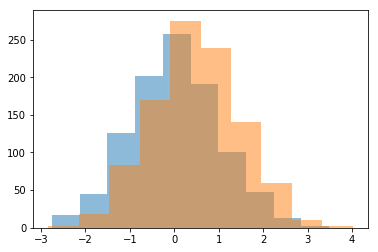

In [112]:
# Plot the first set of data
plt.hist(myData,  bins=10, label="Data 1", alpha=0.5) # Set opacity to 50% using alpha=0.5 (0=fully transparent)

# Plot the second set of data
plt.hist(myData2, bins=10, label="Data 2", alpha=0.5)